# 🛒 E-Commerce Sales Data Analysis — 45+ Questions (Complete)

This notebook solves **45+ practical data analysis questions** on a **600+ rows e-commerce dataset** using Pandas.
Each question is followed by **executable code**. No skipped steps.

---


## 1. Load Libraries & Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('ecommerce_sales_600plus.csv')
df.head()

,OrderID,OrderDate,CustomerCity,Product,Category,Quantity,UnitPrice,TotalAmount,PaymentMode,OrderStatus
0,1,2024-10-19,Jaipur,Mobile,Electronics,1,56715,56715,Cash,Cancelled
1,2,2024-05-22,Jaipur,Camera,Electronics,2,5009,10018,Card,Returned
2,3,2024-07-03,Bangalore,Camera,Accessories,1,55602,55602,Cash,Cancelled
3,4,2024-05-14,Hyderabad,Camera,Electronics,4,23394,93576,Cash,Delivered
4,5,2024-08-13,Delhi,Mobile,Electronics,5,49683,248415,Card,Delivered


## A. Data Understanding (Q1–Q6)

**Q1. Total rows and columns?**

In [2]:
df.shape

(620, 10)

**Q2. Column names?**

In [3]:
df.columns

Index(['OrderID', 'OrderDate', 'CustomerCity', 'Product', 'Category',
       'Quantity', 'UnitPrice', 'TotalAmount', 'PaymentMode', 'OrderStatus'],
      dtype='object')

**Q3. Data types of each column?**

In [4]:
df.dtypes

OrderID          int64
OrderDate       object
CustomerCity    object
Product         object
Category        object
Quantity         int64
UnitPrice        int64
TotalAmount      int64
PaymentMode     object
OrderStatus     object
dtype: object

**Q4. Missing values column-wise?**

In [5]:
df.isnull().sum()

OrderID         0
OrderDate       0
CustomerCity    0
Product         0
Category        0
Quantity        0
UnitPrice       0
TotalAmount     0
PaymentMode     0
OrderStatus     0
dtype: int64

**Q5. Numeric columns summary statistics**

In [6]:
df.describe()

,OrderID,Quantity,UnitPrice,TotalAmount
count,620.000000,620.000000,620.000000,620.000000
mean,310.500000,2.972581,35905.833871,108993.167742
std,179.122863,1.417941,19775.221253,87502.209843
min,1.000000,1.000000,547.000000,547.000000
25%,155.750000,2.000000,18989.000000,37814.500000
50%,310.500000,3.000000,36303.000000,83806.500000
75%,465.250000,4.000000,53574.250000,164231.250000
max,620.000000,5.000000,69983.000000,345325.000000


**Q6. Sample 10 random records**

In [7]:
df.sample(10)

,OrderID,OrderDate,CustomerCity,Product,Category,Quantity,UnitPrice,TotalAmount,PaymentMode,OrderStatus
419,420,2024-08-18,Pune,Tablet,Accessories,3,8206,24618,NetBanking,Returned
484,485,2024-09-16,Bangalore,Camera,Electronics,5,32733,163665,NetBanking,Delivered
578,579,2024-03-24,Chennai,Laptop,Accessories,2,35312,70624,Cash,Returned
397,398,2024-11-19,Jaipur,Mobile,Electronics,3,63669,191007,NetBanking,Cancelled
71,72,2024-02-29,Mumbai,Laptop,Accessories,4,56809,227236,Card,Delivered
40,41,2024-08-07,Chennai,Mouse,Electronics,1,45764,45764,Card,Cancelled
279,280,2024-10-12,Pune,Smartwatch,Accessories,3,31582,94746,NetBanking,Delivered
488,489,2024-02-04,Pune,Smartwatch,Accessories,4,64794,259176,Card,Returned
167,168,2024-06-20,Delhi,Mouse,Accessories,2,5832,11664,Cash,Returned
316,317,2024-11-25,Chennai,Keyboard,Electronics,5,35241,176205,Card,Returned


## B. Data Cleaning (Q7–Q12)

**Q7. Check duplicate rows**

In [8]:
df.duplicated().sum()

np.int64(0)

**Q8. Remove duplicate rows**

In [9]:
df.drop_duplicates(inplace=True)

**Q9. Convert OrderDate to datetime**

In [10]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

**Q10. Verify date conversion**

In [11]:
df['OrderDate'].dtype

dtype('<M8[ns]')

**Q11. Check invalid TotalAmount values**

In [12]:
df[df['TotalAmount'] <= 0]

,OrderID,OrderDate,CustomerCity,Product,Category,Quantity,UnitPrice,TotalAmount,PaymentMode,OrderStatus


**Q12. Dataset shape after cleaning**

In [13]:
df.shape

(620, 10)

## C. Feature Engineering (Q13–Q18)

**Q13. Create Month column**

In [14]:
df['Month'] = df['OrderDate'].dt.month

**Q14. Create Year column**

In [15]:
df['Year'] = df['OrderDate'].dt.year

**Q15. Create HighValueOrder flag (>40000)**

In [16]:
df['HighValueOrder'] = df['TotalAmount'] > 40000

**Q16. Count high value orders**

In [17]:
df['HighValueOrder'].value_counts()

HighValueOrder
True     454
False    166
Name: count, dtype: int64

**Q17. Verify TotalAmount = Quantity × UnitPrice**

In [18]:
df[df['TotalAmount'] != df['Quantity'] * df['UnitPrice']]

,OrderID,OrderDate,CustomerCity,Product,Category,Quantity,UnitPrice,TotalAmount,PaymentMode,OrderStatus,Month,Year,HighValueOrder


**Q18. Create OrderValueCategory column**

In [19]:
df['OrderValueCategory'] = pd.cut(
    df['TotalAmount'],
    bins=[0,10000,40000,df['TotalAmount'].max()],
    labels=['Low','Medium','High']
)

## D. Revenue & Sales Metrics (Q19–Q25)

**Q19. Total Revenue**

In [20]:
df['TotalAmount'].sum()

np.int64(67575764)

**Q20. Average Order Value (AOV)**

In [21]:
df['TotalAmount'].mean()

np.float64(108993.16774193548)

**Q21. Max & Min Order Value**

In [22]:
df['TotalAmount'].agg(['min','max'])

min       547
max    345325
Name: TotalAmount, dtype: int64

**Q22. Total Quantity Sold**

In [23]:
df['Quantity'].sum()

np.int64(1843)

**Q23. Average Quantity per Order**

In [24]:
df['Quantity'].mean()

np.float64(2.9725806451612904)

**Q24. Top 5 highest value orders**

In [25]:
df.sort_values('TotalAmount', ascending=False).head(5)

,OrderID,OrderDate,CustomerCity,Product,Category,Quantity,UnitPrice,TotalAmount,PaymentMode,OrderStatus,Month,Year,HighValueOrder,OrderValueCategory
507,508,2024-04-19,Hyderabad,Headphones,Accessories,5,69065,345325,Card,Cancelled,4,2024,True,High
496,497,2024-06-11,Jaipur,Camera,Accessories,5,68643,343215,NetBanking,Delivered,6,2024,True,High
190,191,2024-07-13,Mumbai,Keyboard,Accessories,5,68406,342030,Card,Delivered,7,2024,True,High
485,486,2024-06-03,Kolkata,Tablet,Electronics,5,68002,340010,Card,Cancelled,6,2024,True,High
181,182,2024-08-22,Kolkata,Laptop,Electronics,5,67779,338895,NetBanking,Cancelled,8,2024,True,High


**Q25. Bottom 5 lowest value orders**

In [26]:
df.sort_values('TotalAmount').head(5)

,OrderID,OrderDate,CustomerCity,Product,Category,Quantity,UnitPrice,TotalAmount,PaymentMode,OrderStatus,Month,Year,HighValueOrder,OrderValueCategory
432,433,2024-06-01,Bangalore,Camera,Accessories,1,547,547,Cash,Delivered,6,2024,False,Low
124,125,2024-07-17,Jaipur,Smartwatch,Electronics,1,573,573,Cash,Returned,7,2024,False,Low
16,17,2024-07-31,Jaipur,Laptop,Electronics,1,870,870,NetBanking,Delivered,7,2024,False,Low
489,490,2024-09-19,Jaipur,Camera,Electronics,1,2061,2061,NetBanking,Delivered,9,2024,False,Low
403,404,2024-10-27,Chennai,Mouse,Accessories,2,1061,2122,Cash,Delivered,10,2024,False,Low


## E. City-wise Analysis (Q26–Q31)

**Q26. City-wise total revenue**

In [27]:
df.groupby('CustomerCity')['TotalAmount'].sum().sort_values(ascending=False)

CustomerCity
Delhi        10457834
Pune          8976750
Kolkata       8361573
Jaipur        8239810
Chennai       8096676
Hyderabad     8031529
Bangalore     7980355
Mumbai        7431237
Name: TotalAmount, dtype: int64

**Q27. City-wise order count**

In [28]:
df['CustomerCity'].value_counts()

CustomerCity
Delhi        82
Chennai      82
Pune         82
Hyderabad    79
Jaipur       77
Mumbai       74
Bangalore    72
Kolkata      72
Name: count, dtype: int64

**Q28. City-wise average order value**

In [29]:
df.groupby('CustomerCity')['TotalAmount'].mean().sort_values(ascending=False)

CustomerCity
Delhi        127534.560976
Kolkata      116132.958333
Bangalore    110838.263889
Pune         109472.560976
Jaipur       107010.519481
Hyderabad    101664.924051
Mumbai       100422.121622
Chennai       98739.951220
Name: TotalAmount, dtype: float64

**Q29. Top 5 revenue cities**

In [30]:
df.groupby('CustomerCity')['TotalAmount'].sum().sort_values(ascending=False).head(5)

CustomerCity
Delhi      10457834
Pune        8976750
Kolkata     8361573
Jaipur      8239810
Chennai     8096676
Name: TotalAmount, dtype: int64

**Q30. Bottom 5 revenue cities**

In [31]:
df.groupby('CustomerCity')['TotalAmount'].sum().sort_values().head(5)

CustomerCity
Mumbai       7431237
Bangalore    7980355
Hyderabad    8031529
Chennai      8096676
Jaipur       8239810
Name: TotalAmount, dtype: int64

**Q31. City with highest average order value**

In [32]:
df.groupby('CustomerCity')['TotalAmount'].mean().idxmax()

'Delhi'

## F. Product Analysis (Q32–Q37)

**Q32. Product-wise quantity sold**

In [33]:
df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

Product
Laptop        274
Camera        259
Keyboard      245
Tablet        242
Mobile        215
Smartwatch    214
Mouse         204
Headphones    190
Name: Quantity, dtype: int64

**Q33. Product-wise revenue**

In [34]:
df.groupby('Product')['TotalAmount'].sum().sort_values(ascending=False)

Product
Laptop        10195767
Tablet         9455268
Keyboard       9342398
Camera         8718555
Smartwatch     8167136
Mouse          7492471
Mobile         7214463
Headphones     6989706
Name: TotalAmount, dtype: int64

**Q34. Top 5 products by quantity**

In [35]:
df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)

Product
Laptop      274
Camera      259
Keyboard    245
Tablet      242
Mobile      215
Name: Quantity, dtype: int64

**Q35. Top 5 products by revenue**

In [36]:
df.groupby('Product')['TotalAmount'].sum().sort_values(ascending=False).head(5)

Product
Laptop        10195767
Tablet         9455268
Keyboard       9342398
Camera         8718555
Smartwatch     8167136
Name: TotalAmount, dtype: int64

**Q36. Category-wise revenue**

In [37]:
df.groupby('Category')['TotalAmount'].sum()

Category
Accessories    36139491
Electronics    31436273
Name: TotalAmount, dtype: int64

**Q37. Category-wise average order value**

In [38]:
df.groupby('Category')['TotalAmount'].mean()

Category
Accessories    109846.477204
Electronics    108028.429553
Name: TotalAmount, dtype: float64

## G. Payment & Order Status (Q38–Q42)

**Q38. Payment mode distribution**

In [39]:
df['PaymentMode'].value_counts()

PaymentMode
Cash          175
Card          172
NetBanking    137
UPI           136
Name: count, dtype: int64

**Q39. Payment mode-wise revenue**

In [40]:
df.groupby('PaymentMode')['TotalAmount'].sum()

PaymentMode
Card          19168362
Cash          20106483
NetBanking    15437048
UPI           12863871
Name: TotalAmount, dtype: int64

**Q40. OrderStatus distribution**

In [41]:
df['OrderStatus'].value_counts()

OrderStatus
Cancelled    217
Returned     210
Delivered    193
Name: count, dtype: int64

**Q41. Cancellation rate (%)**

In [42]:
(df['OrderStatus'].value_counts().get('Cancelled',0) / len(df)) * 100

np.float64(35.0)

**Q42. Returned order percentage**

In [43]:
(df['OrderStatus'].value_counts().get('Returned',0) / len(df)) * 100

np.float64(33.87096774193548)

## H. Time-based Analysis (Q43–Q46)

**Q43. Month-wise total revenue**

In [44]:
df.groupby('Month')['TotalAmount'].sum()

Month
1     7787573
2     6600839
3     5555974
4     5236781
5     5744735
6     5335754
7     6624853
8     7226840
9     5905632
10    6369031
11    5187752
Name: TotalAmount, dtype: int64

**Q44. Month-wise order count**

In [45]:
df['Month'].value_counts().sort_index()

Month
1     69
2     53
3     52
4     42
5     59
6     53
7     67
8     64
9     57
10    57
11    47
Name: count, dtype: int64

**Q45. Peak revenue month**

In [46]:
df.groupby('Month')['TotalAmount'].sum().idxmax()

np.int32(1)

**Q46. Month-wise average order value**

In [47]:
df.groupby('Month')['TotalAmount'].mean()

Month
1     112863.376812
2     124544.132075
3     106845.653846
4     124685.261905
5      97368.389831
6     100674.603774
7      98878.402985
8     112919.375000
9     103607.578947
10    111737.385965
11    110377.702128
Name: TotalAmount, dtype: float64

## I. Visualizations (Q47–Q50)

**Q47. City-wise revenue bar chart**

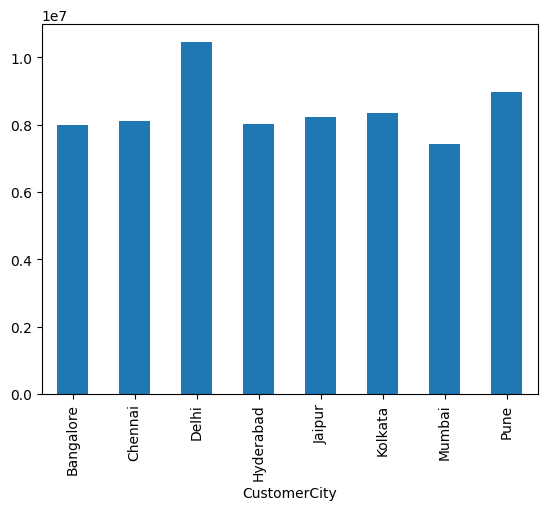

In [48]:
df.groupby('CustomerCity')['TotalAmount'].sum().plot(kind='bar')
plt.show()

**Q48. Product-wise quantity bar chart**

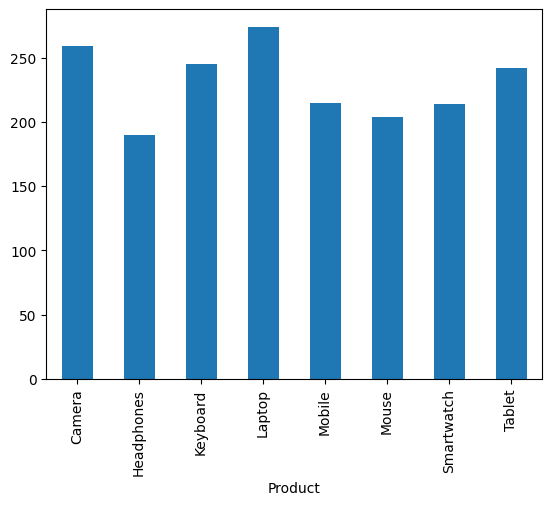

In [49]:
df.groupby('Product')['Quantity'].sum().plot(kind='bar')
plt.show()

**Q49. Category-wise revenue pie chart**

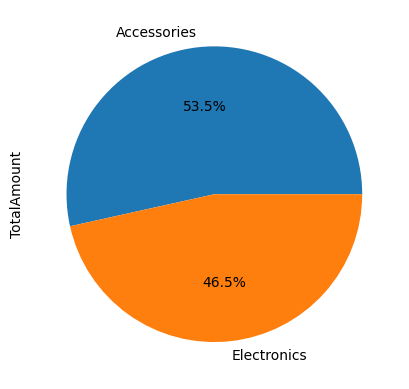

In [50]:
df.groupby('Category')['TotalAmount'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.show()

**Q50. Monthly revenue line chart**

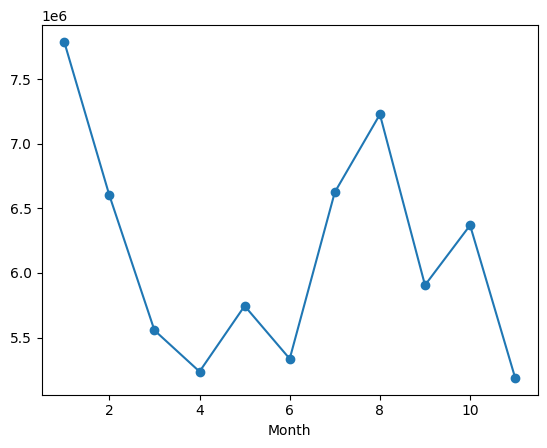

In [51]:
df.groupby('Month')['TotalAmount'].sum().plot(kind='line', marker='o')
plt.show()

In [ ]:
df.to_csv("Cleaned_Data.csv", index=False)

## Final Insights
- Revenue is concentrated in a few top cities and products
- High-value orders contribute a disproportionate share of revenue
- Clear monthly seasonality is visible
- Digital payments dominate transactions
